# Loading Data from CSV file

* The Pandas library in Python provides excellent, built-in support for time series data.
* Pandas represents time series datasets as a **Series**. 
* A Series is a one-dimensional array with a time label for each row.
* A Dataframe is a collection of series

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('C:/project/order_item.csv', header=0 , parse_dates=['dates'])

In [3]:
df.head()

,order_id,sku_id,sku_id.1,store_id,dates,customer_id,quantity,amount
0,40217,31,31,10,2021-09-05,NaN,1.026,1.03
1,40218,31,31,10,2021-09-05,NaN,1.018,1.02
2,40219,116,116,11,2021-09-05,NaN,2.000,18.00
3,40220,31,31,11,2021-09-05,NaN,1.000,1.00
4,40220,29,29,11,2021-09-05,NaN,1.000,25.00


In [4]:
df=df.loc[(df['store_id'] == 14) & (df['sku_id'] == 116)]

<AxesSubplot:ylabel='quantity'>

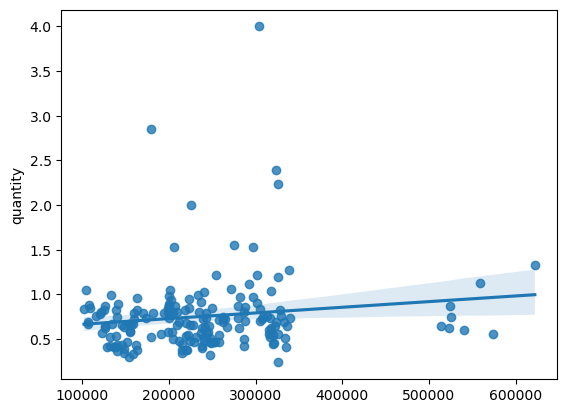

In [5]:
sns.regplot(x= df.index.values, y=df['quantity'])

### Creating Lag plots

In [6]:
df = df.resample('D', on='dates').sum()

In [7]:
df=df.drop(['order_id','sku_id','sku_id.1','store_id','customer_id','amount'],axis=1)

In [8]:
df['quantity_lag'] =  df['quantity'].shift(1)

In [9]:
df.head(10)

,quantity,quantity_lag
dates,,
2021-12-10,0.841,NaN
2021-12-11,0.000,0.841
2021-12-12,1.050,0.000
2021-12-13,1.360,1.050
2021-12-14,1.732,1.360
2021-12-15,0.000,1.732
2021-12-16,0.000,0.000
2021-12-17,0.756,0.000
2021-12-18,0.000,0.756


<AxesSubplot:xlabel='quantity_lag', ylabel='quantity'>

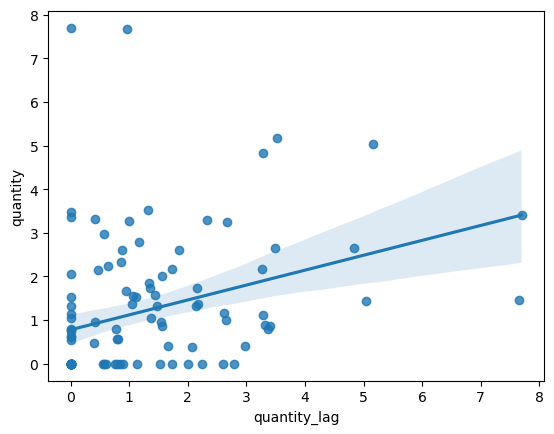

In [10]:
sns.regplot(x=df['quantity_lag'], y=df['quantity'])

| Alias  | Description           |
|--------|-----------------------|
| B      | Business day          |
| D      | Calendar day          |
| W      | Weekly                |
| M      | Month end             |
| Q      | Quarter end           |
| A      | Year end              |
| BA     | Business year end     |
| AS     | Year start            |
| H      | Hourly frequency      |
| T, min | Minutely frequency    |
| S      | Secondly frequency    |
| L, ms  | Millisecond frequency |
| U, us  | Microsecond frequency |
| N, ns  | Nanosecond frequency  |

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

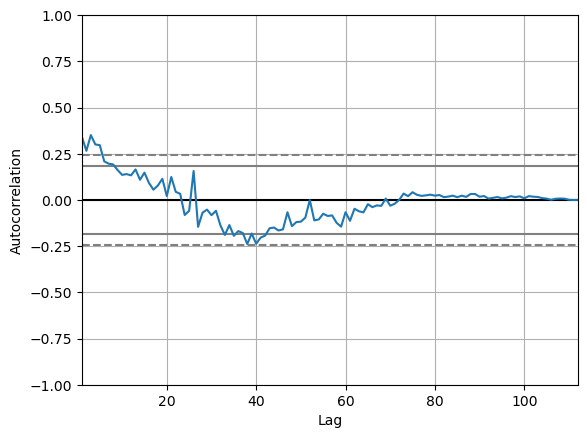

In [11]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['quantity'])

## Decomposing Time Series

**Additive Model** 

y(t) = Level + Trend + Seasonality + Noise

**Multiplicative Model** 

y(t) = Level * Trend * Seasonality * Noise

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [13]:
df.head()

,quantity,quantity_lag
dates,,
2021-12-10,0.841,NaN
2021-12-11,0.000,0.841
2021-12-12,1.050,0.000
2021-12-13,1.360,1.050
2021-12-14,1.732,1.360


In [14]:
result = seasonal_decompose(df['quantity'], model='additive',extrapolate_trend='freq', period=1)

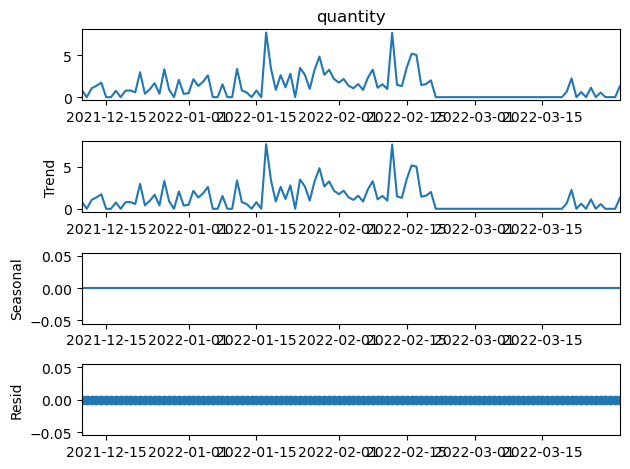

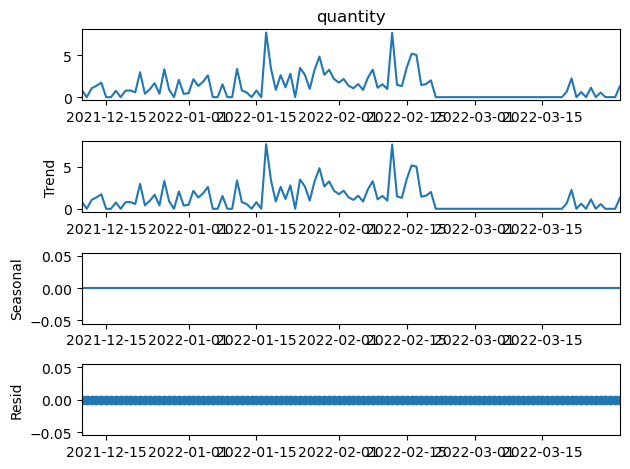

In [15]:
result.plot()

### Differencing

In [16]:
df_diff = df.copy()

In [17]:
df_diff.head()

,quantity,quantity_lag
dates,,
2021-12-10,0.841,NaN
2021-12-11,0.000,0.841
2021-12-12,1.050,0.000
2021-12-13,1.360,1.050
2021-12-14,1.732,1.360


In [18]:
df_diff['quantity_diff_1'] = df_diff['quantity'].diff(periods=1)

In [19]:
df_diff.head()

,quantity,quantity_lag,quantity_diff_1
dates,,,
2021-12-10,0.841,NaN,NaN
2021-12-11,0.000,0.841,-0.841
2021-12-12,1.050,0.000,1.050
2021-12-13,1.360,1.050,0.310
2021-12-14,1.732,1.360,0.372


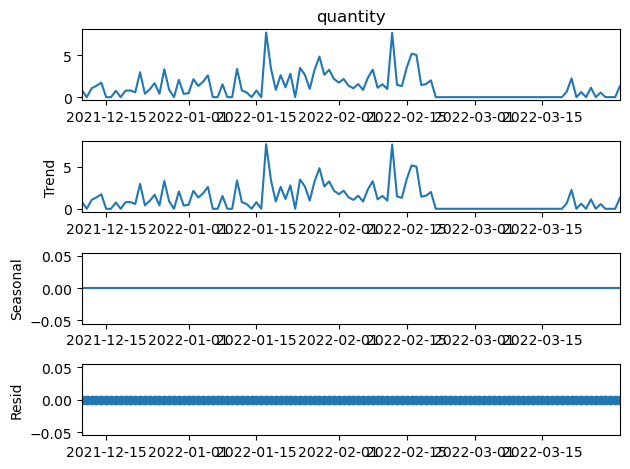

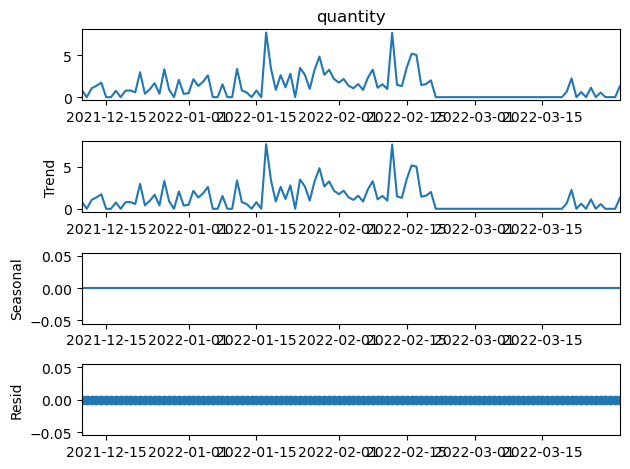

In [20]:
result_a = seasonal_decompose(df_diff['quantity'], model='additive',extrapolate_trend='freq', period=1)
result_a.plot()

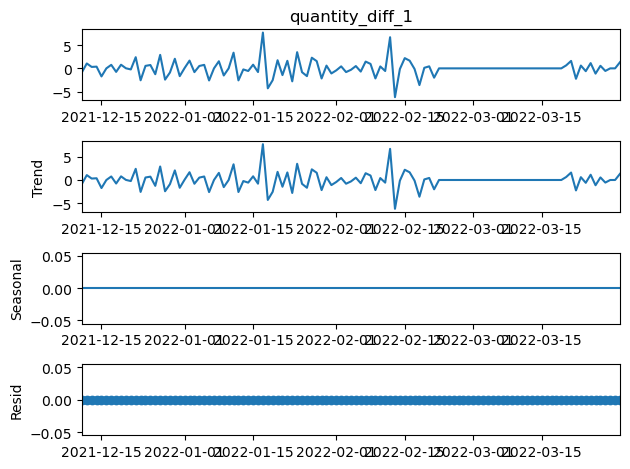

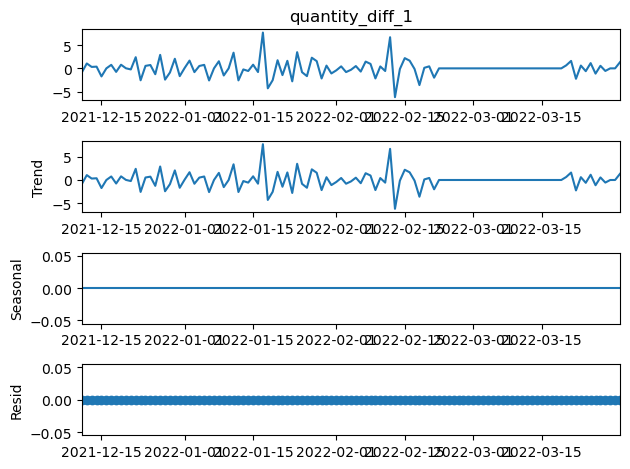

In [21]:
result_b = seasonal_decompose(df_diff.iloc[1:,2], model='additive',extrapolate_trend='freq', period=1)
result_b.plot()

## Test-Train Split

In [22]:
temp_df = df.copy()

In [23]:
temp_df.head()

,quantity,quantity_lag
dates,,
2021-12-10,0.841,NaN
2021-12-11,0.000,0.841
2021-12-12,1.050,0.000
2021-12-13,1.360,1.050
2021-12-14,1.732,1.360


In [24]:
temp_df.shape

(112, 2)

In [25]:
train_size = int(temp_df.shape[0]*0.8)
train_size

89

In [26]:
train =  temp_df[0:train_size]

In [27]:
test =  temp_df[train_size:]

In [28]:
train.shape

(89, 2)

In [29]:
test.shape

(23, 2)

### Persistence Model

In [30]:
df2 = df.copy()

In [31]:
df2.head()

,quantity,quantity_lag
dates,,
2021-12-10,0.841,NaN
2021-12-11,0.000,0.841
2021-12-12,1.050,0.000
2021-12-13,1.360,1.050
2021-12-14,1.732,1.360


In [32]:
df2=df2.drop(['quantity_lag'],axis=1)

In [33]:
df2['t'] =  df2['quantity'].shift(1)

In [34]:
df2.head()

,quantity,t
dates,,
2021-12-10,0.841,NaN
2021-12-11,0.000,0.841
2021-12-12,1.050,0.000
2021-12-13,1.360,1.050
2021-12-14,1.732,1.360


In [35]:
train, test = df2[1:df2.shape[0]-41], df2[df2.shape[0]-41:]

In [36]:
train.head()

,quantity,t
dates,,
2021-12-11,0.000,0.841
2021-12-12,1.050,0.000
2021-12-13,1.360,1.050
2021-12-14,1.732,1.360
2021-12-15,0.000,1.732


In [37]:
train_X, train_y = train['t'], train['quantity']
test_X, test_y = test['t'], test['quantity']

#### # walk-forward validation

In [38]:
predictions = test_X.copy()

In [39]:
print(predictions)
print(test_y)

dates
2022-02-19    1.444
2022-02-20    1.566
2022-02-21    2.002
2022-02-22    0.000
2022-02-23    0.000
2022-02-24    0.000
2022-02-25    0.000
2022-02-26    0.000
2022-02-27    0.000
2022-02-28    0.000
2022-03-01    0.000
2022-03-02    0.000
2022-03-03    0.000
2022-03-04    0.000
2022-03-05    0.000
2022-03-06    0.000
2022-03-07    0.000
2022-03-08    0.000
2022-03-09    0.000
2022-03-10    0.000
2022-03-11    0.000
2022-03-12    0.000
2022-03-13    0.000
2022-03-14    0.000
2022-03-15    0.000
2022-03-16    0.000
2022-03-17    0.000
2022-03-18    0.000
2022-03-19    0.000
2022-03-20    0.000
2022-03-21    0.642
2022-03-22    2.242
2022-03-23    0.000
2022-03-24    0.604
2022-03-25    0.000
2022-03-26    1.130
2022-03-27    0.000
2022-03-28    0.554
2022-03-29    0.000
2022-03-30    0.000
2022-03-31    0.000
Freq: D, Name: t, dtype: float64
dates
2022-02-19    1.566
2022-02-20    2.002
2022-02-21    0.000
2022-02-22    0.000
2022-02-23    0.000
2022-02-24    0.000
2022-02-25    0

In [40]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, predictions)
mse

0.4360457560975609

In [41]:
from matplotlib import pyplot

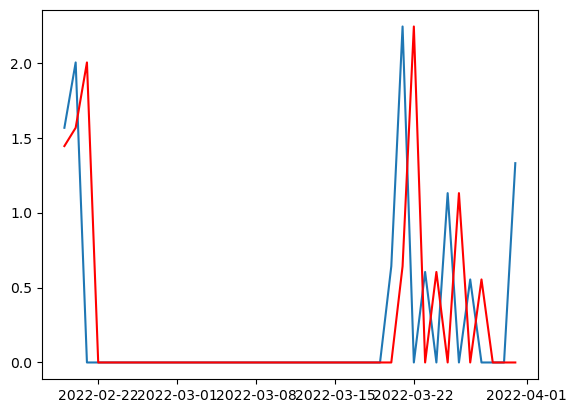

In [42]:
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')

### Autoregression Model

In [43]:
df3 = df_diff.copy()

In [44]:
df3.shape

(112, 3)

In [45]:
df3.tail()

,quantity,quantity_lag,quantity_diff_1
dates,,,
2022-03-27,0.554,0.000,0.554
2022-03-28,0.000,0.554,-0.554
2022-03-29,0.000,0.000,0.000
2022-03-30,0.000,0.000,0.000
2022-03-31,1.330,0.000,1.330


In [46]:
train, test = df3.quantity_diff_1[1:df3.shape[0]-41], df3.quantity_diff_1[df3.shape[0]-41:]

In [47]:
train.head()

dates
2021-12-11   -0.841
2021-12-12    1.050
2021-12-13    0.310
2021-12-14    0.372
2021-12-15   -1.732
Freq: D, Name: quantity_diff_1, dtype: float64

In [48]:
from statsmodels.tsa.ar_model import AutoReg

In [49]:
model = AutoReg(train, lags=1)
model_fit = model.fit()

#### Coef of lag variables

In [50]:
model_fit.params

const                 0.048951
quantity_diff_1.L1   -0.460490
dtype: float64

In [51]:
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1)

In [52]:
predictions

2022-02-19    1.704874
2022-02-20   -0.736128
2022-02-21    0.387930
2022-02-22   -0.129688
2022-02-23    0.108671
2022-02-24   -0.001091
2022-02-25    0.049453
2022-02-26    0.026178
2022-02-27    0.036896
2022-02-28    0.031960
2022-03-01    0.034233
2022-03-02    0.033187
2022-03-03    0.033669
2022-03-04    0.033447
2022-03-05    0.033549
2022-03-06    0.033502
2022-03-07    0.033523
2022-03-08    0.033513
2022-03-09    0.033518
2022-03-10    0.033516
2022-03-11    0.033517
2022-03-12    0.033516
2022-03-13    0.033517
2022-03-14    0.033517
2022-03-15    0.033517
2022-03-16    0.033517
2022-03-17    0.033517
2022-03-18    0.033517
2022-03-19    0.033517
2022-03-20    0.033517
2022-03-21    0.033517
2022-03-22    0.033517
2022-03-23    0.033517
2022-03-24    0.033517
2022-03-25    0.033517
2022-03-26    0.033517
2022-03-27    0.033517
2022-03-28    0.033517
2022-03-29    0.033517
2022-03-30    0.033517
2022-03-31    0.033517
Freq: D, dtype: float64

In [53]:
predictions.iloc[0]

1.7048742391690002

In [54]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, predictions)
mse

0.4013787567750823

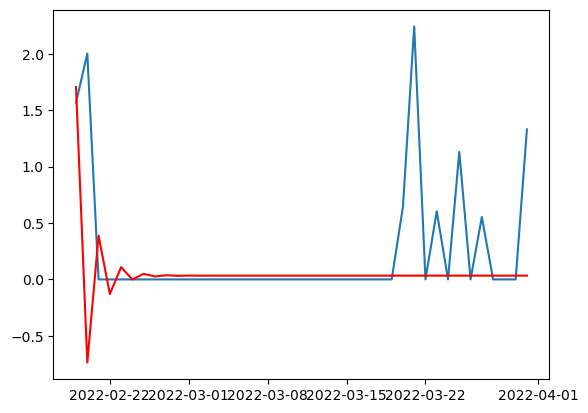

In [55]:
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')

### Walk Forward

In [56]:
df4 = df_diff.copy()

In [57]:
df4.head()

,quantity,quantity_lag,quantity_diff_1
dates,,,
2021-12-10,0.841,NaN,NaN
2021-12-11,0.000,0.841,-0.841
2021-12-12,1.050,0.000,1.050
2021-12-13,1.360,1.050,0.310
2021-12-14,1.732,1.360,0.372


In [58]:
train, test = df4.quantity[1:df4.shape[0]-41], df4.quantity[df4.shape[0]-41:]

In [59]:
data = train
predict =[]
for t in test:
    model = AutoReg(data,lags=1)
    model_fit = model.fit()
    y = model_fit.predict(start=len(data), end=len(train)+len(test)-1)
    print(y.values[0])
    predict.append(y.values[0])
    data = np.append(data, t)
    data = pd.Series(data)
    

1.7147732382532408
1.7293456783950676
1.7930260312066213
1.497996573451184
1.4546280514958339
1.4137000009151068
1.3750120606478768
1.3383852180800706
1.3036590394758765
1.2706893206656402
1.239346085427132
1.209511872971137
1.1810802669601899
1.1539546272297483
1.1280469923554521
1.1032771268061672
1.0795716909364481
1.0568635157314183
1.0350909671979474
1.014197387735413
0.9941306038242663
0.974842491025542
0.9562885886558016
0.9384277576429433
0.9212218760208635
0.9046355673192615
0.88863595777603
0.8731924588659118
0.8582765721182495
0.8438617136033872
1.0571809676664259
1.6060817040628952
0.8481365583730824
1.0431904024265903
0.8307713855374668
1.20906386223235
0.8233404402753813
1.0033746599062943
0.8066807117373611
0.7946464830253477
0.782966034740533


In [60]:
predict

[1.7147732382532408,
 1.7293456783950676,
 1.7930260312066213,
 1.497996573451184,
 1.4546280514958339,
 1.4137000009151068,
 1.3750120606478768,
 1.3383852180800706,
 1.3036590394758765,
 1.2706893206656402,
 1.239346085427132,
 1.209511872971137,
 1.1810802669601899,
 1.1539546272297483,
 1.1280469923554521,
 1.1032771268061672,
 1.0795716909364481,
 1.0568635157314183,
 1.0350909671979474,
 1.014197387735413,
 0.9941306038242663,
 0.974842491025542,
 0.9562885886558016,
 0.9384277576429433,
 0.9212218760208635,
 0.9046355673192615,
 0.88863595777603,
 0.8731924588659118,
 0.8582765721182495,
 0.8438617136033872,
 1.0571809676664259,
 1.6060817040628952,
 0.8481365583730824,
 1.0431904024265903,
 0.8307713855374668,
 1.20906386223235,
 0.8233404402753813,
 1.0033746599062943,
 0.8066807117373611,
 0.7946464830253477,
 0.782966034740533]

In [61]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test.values, predict)
mse

1.1301751376377924

In [62]:
test.values

array([1.566, 2.002, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.642, 2.242, 0.   , 0.604, 0.   , 1.13 , 0.   ,
       0.554, 0.   , 0.   , 0.   , 1.33 ])

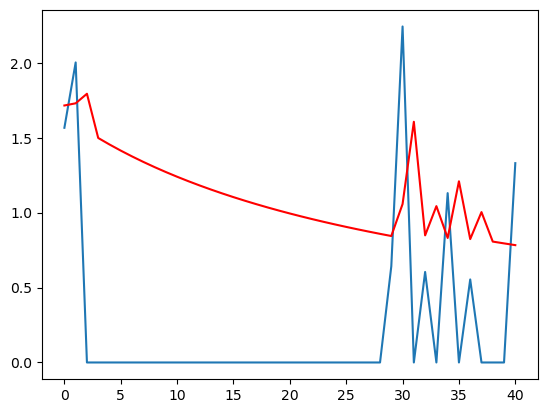

In [63]:
pyplot.plot(test.values)
pyplot.plot(predict, color='red')

### Walk Forward ARIMA

In [64]:
df = df_diff.copy()

In [65]:
df.head()

,quantity,quantity_lag,quantity_diff_1
dates,,,
2021-12-10,0.841,NaN,NaN
2021-12-11,0.000,0.841,-0.841
2021-12-12,1.050,0.000,1.050
2021-12-13,1.360,1.050,0.310
2021-12-14,1.732,1.360,0.372


In [66]:
train_size = int(df.shape[0]*0.8)

In [67]:
train, test = df.quantity[0:train_size], df.quantity[train_size:]

In [68]:
test.shape

(23,)

In [69]:
from statsmodels.tsa.arima.model import ARIMA

data = train
predict = []

for t in test:
    model = ARIMA(data, order=(5, 1, 0))
    model_fit = model.fit()
    y = model_fit.forecast()
    print(y[0])
    predict.append(y[0])
    
    data = np.append(data, y[0])
    


2.2108616771993837e-37
-7.663346426307718e-38
2.4801225452495565e-39
5.609829788279941e-38
2.4413320677986345e-38
4.331088542987035e-38
2.147256701795154e-38
2.3123803499100974e-38
3.4578102189394195e-38
2.963091649415558e-38
2.95375716616421e-38
2.8919391354241084e-38
2.8689919518894933e-38
3.0051760716659487e-38
2.956654197315401e-38
2.9267283051167077e-38
2.937931579586189e-38
2.93746159255296e-38
2.948157197334383e-38
2.944311679240785e-38
2.938816376039387e-38
2.9413238748136366e-38
2.942084364834016e-38


In [70]:
predict

[2.2108616771993837e-37,
 -7.663346426307718e-38,
 2.4801225452495565e-39,
 5.609829788279941e-38,
 2.4413320677986345e-38,
 4.331088542987035e-38,
 2.147256701795154e-38,
 2.3123803499100974e-38,
 3.4578102189394195e-38,
 2.963091649415558e-38,
 2.95375716616421e-38,
 2.8919391354241084e-38,
 2.8689919518894933e-38,
 3.0051760716659487e-38,
 2.956654197315401e-38,
 2.9267283051167077e-38,
 2.937931579586189e-38,
 2.93746159255296e-38,
 2.948157197334383e-38,
 2.944311679240785e-38,
 2.938816376039387e-38,
 2.9413238748136366e-38,
 2.942084364834016e-38]

In [71]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test.values, predict)
mse

0.3980982608695652

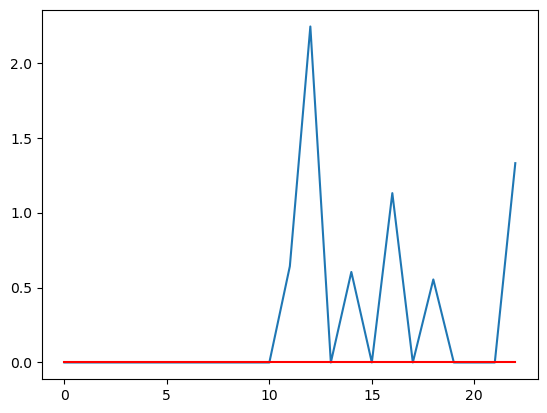

In [72]:
pyplot.plot(test.values)
pyplot.plot(predict, color='red')